In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as math
import seaborn as sns

I can't find a csv with the information I'm looking for so instead I'll create the df from scratch. Hawaii became a state in 1959 and conducted elections for Senate that year. Then there was an election every two years in line with the federal schedule beginning in 1960. Rather than type every year, we'll generate a list using a for loop.

In [3]:
#initialize an empty list for election years
year = []

 #initialize a loop incrementing year by 2 between 1960 and 2022. Convert the result of each interation to a string and append it to the empty list 'year'
for i in range(1960,2024, 2):

    year.append(str(i))

#insert the 1959 election at index zero
year.insert(0,'1959')

#print the list to ensure we've done it correctly
print(year)

['1959', '1960', '1962', '1964', '1966', '1968', '1970', '1972', '1974', '1976', '1978', '1980', '1982', '1984', '1986', '1988', '1990', '1992', '1994', '1996', '1998', '2000', '2002', '2004', '2006', '2008', '2010', '2012', '2014', '2016', '2018', '2020', '2022']


Excellent, passing this list into our df will save a lot of typing. Unfortunately, the rest will have to be done one at a time by hand using the election information I found here: https://elections.hawaii.gov/resources/registration-voter-turnout-statistics/
Your local county or state will keep similar records, which you can use to copy this project and make it your own. If you're lucky they may even share a csv.

In [6]:
#We'll create our df from a dictionary using the key:values pair format. We can pass our list 'year' for the first parameter and then get to typing. 
election_summary_data = {
    'Year' : year,
    'Registered_Voters': [123298,137619,157022,170857,187485,204679,219379,253752,256097,268110,295581,284013,284253,292201,292653,308140,314832,304539,335173,377287,411071,439934,464673,430285,447727,450522,460244,461896,466553,483076,490408,525153,562630],
    'Voter_Turnout_Primary': [102274,94149,123321,111946,129677,124694,152557,151735,178729,189267,219379,196283,197904,153275,208640,201358,188640,172039,225406,199201,201583,189432,192146,184860,192322,167047,207461,206105,202728,169531,189421,275744,228522],
    'Voter_Turnout_General': [121999,136812,147728,161913,166187,183166,189812,220594,205903,234152,219584,234469,239970,258811,253470,270223,252621,272081,269121,261781,291114,257840,270071,300265,239753,308443,266266,298815,249436,291446,262700,385442,277194]

}

df = pd.DataFrame.from_dict(election_summary_data)
print(df.head())

   Year  Registered_Voters  Voter_Turnout_Primary  Voter_Turnout_General
0  1959             123298                 102274                 121999
1  1960             137619                  94149                 136812
2  1962             157022                 123321                 147728
3  1964             170857                 111946                 161913
4  1966             187485                 129677                 166187


Cool, df looks great! Now let's vizualize to ensure it all looks good. Since we copied these numbers by hand we'll want to vizualize to ensure that we didn't miss a digit or make any goofs.

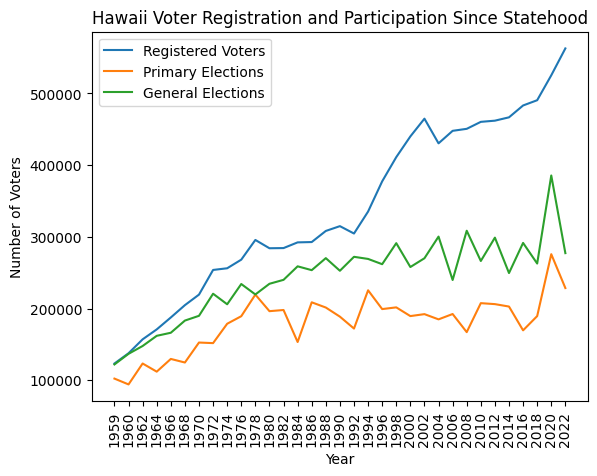

In [5]:
plt.plot('Year','Registered_Voters', data= df, label = 'Registered Voters')
plt.plot('Year','Voter_Turnout_Primary', data= df, label = 'Primary Elections')
plt.plot('Year','Voter_Turnout_General', data= df, label = 'General Elections')
plt.xticks(rotation = 90)
plt.ylabel('Number of Voters')
plt.xlabel('Year')
plt.title('Hawaii Voter Registration and Participation Since Statehood')
plt.legend()
plt.show()

Cool, in terms of elections, 2020 draws our attention immediately as an extreme outlier. Checking our source material, and the close correlation of the primary and general election spikes lead me to conclude that this data was entered correctly and doesn't require changing. The 1984 primary election turnout dip also looks odd to me, but looking at the source material I can confirm I've recorded it correctly. 

No matter what municipality's data you're working with you will also observe rapid rises in the number of registered voters beginning around 1993. This is thanks to the National Voter Registration Act of 1993 (NVRA), also known as the Moter Voter Act. This act required all states to provide the opportunity to register each time a person visits the DMV. It was succesful in expanding access to the ballot box, as evidenced by the increase in registered voters. We can mark the NVRA as a point of interest on the graph:


If you have other anomalies at this point in the process, you should review your data and source material to ensure that your data entry was correct. For instance - we can see that general election turnout exceeds primary turnout in every election, so if you have a data point where the primary turnout significantly exceeds general turnout you may have made an error. 